In [12]:
import numpy as np
import keras

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
train_path = "C:/Users/fahad/Desktop/datasets/Training BT 1"
test_path = "C:/Users/fahad/Desktop/datasets/Testing BT 1"

In [15]:
train_data = ImageDataGenerator(rescale = 1./225)
test_data = ImageDataGenerator(rescale = 1./225)

In [16]:
X = train_data.flow_from_directory(train_path,target_size =(150,150),batch_size=32,class_mode = 'categorical')

y = test_data.flow_from_directory(test_path,target_size =(150,150),batch_size=32,class_mode = 'categorical')

Found 5773 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense

In [18]:
model = Sequential()

In [19]:
model.add(Conv2D(filters = 32 , kernel_size = (4,4),input_shape = (150,150,3),activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Flatten())

C:\Users\fahad\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.add(Dense(units = 70,activation ='relu'))
model.add(Dense(units = 4,activation ='softmax'))

In [21]:
model.compile(optimizer = "adam",loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [22]:

model.fit(X,validation_data = y,epochs = 2,steps_per_epoch =15)

Epoch 1/2


C:\Users\fahad\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.3374 - loss: 3.0749 - val_accuracy: 0.5637 - val_loss: 1.0965
Epoch 2/2
15/15 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.5611 - loss: 1.0191 - val_accuracy: 0.6621 - val_loss: 0.8713


In [23]:
model.save("braintumor.keras")

In [24]:
import cv2

In [25]:
from keras.models import load_model

In [26]:
from keras.utils import img_to_array,load_img

In [27]:
img = load_img("C:/Users/fahad/Desktop/datasets/glioma tumour.jpeg",target_size = (150,150))

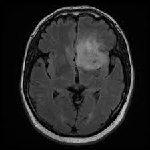

In [28]:
img

In [29]:
img = img_to_array(img)

In [30]:
img

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [1., 1., 1.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [1., 1., 1.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)

In [31]:
img = img/255.

In [32]:
img = np.expand_dims(img,axis = 0)

In [33]:
img.shape

(1, 150, 150, 3)

In [34]:
model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


array([[0.05031225, 0.11396497, 0.57627577, 0.25944698]], dtype=float32)

HfHubHTTPError: (Request ID: Root=1-66f50dfc-46dbe70460bc8db87bddede4;20e12dfa-e349-4ae5-8c11-35b08251d504)

403 Forbidden: You don't have the rights to create a model under the namespace "fahadMizan".
Cannot access content at: https://huggingface.co/api/repos/create.
Make sure your token has the correct permissions.